In [1]:
from typing import TypedDict,List
from langgraph.graph import StateGraph,START,END
import random

In [2]:
class Agentstate(TypedDict):
  player_name:str
  guess:List[int]
  attempts:int
  lower_bound:int
  upper_bound:int
  hint:str
  target_number:int

In [3]:
def setup(state:Agentstate)->Agentstate:
  state["player_name"] = f"Welcome, {state['player_name']}!"
  state['attempts']=0
  state['lower_bound']=1
  state['upper_bound']=20
  state['target_number']=random.randint(state['lower_bound'],state['upper_bound'])
  state['guess']=[]
  state['hint']='None'
  print(f"{state['player_name']} The game has begun. I'm thinking of a number between 1 and 20.")
  return state

In [4]:
def guesses(state:Agentstate)->Agentstate:
  possible_guess={i for i in range(state['lower_bound'],state['upper_bound']+1) if i not in state['guess']}

  if possible_guess:
    guess = random.choice(list(possible_guess))
  else:
    guess=random.randint(state['lower_bound'],state['upper_bound'])

  state['guess'].append(guess)
  state['attempts']+=1
  print(f"Attempt {state['attempts']}: Guessing {guess} (Current range: {state['lower_bound']}-{state['upper_bound']})")
  return state

In [5]:
def hint_node(state:Agentstate)->Agentstate:
  latest_guess=state['guess'][-1]
  target=state['target_number']

  if latest_guess < target:
    state['hint']=f"The number {latest_guess} is too low"
    state['lower_bound']=max(state['lower_bound'],latest_guess+1)
    print(f"Hint: {state['hint']}")

  elif latest_guess>target:
    state['hint']=f"The number {latest_guess} is too high"
    state['upper_bound']=min(state['upper_bound'],latest_guess-1)
    print(f"Hint: {state['hint']}")

  else:
    state['hint']=f"Congratulations! You guessed the number {target} in {state['attempts']} attempts."
  return state

In [6]:
def should_continue(state:Agentstate)->Agentstate:
  latest_guess=state['guess'][-1]

  if latest_guess==state['target_number']:
    print(f"You found the answer in {state['attempts']} attempts!")
    return "end"

  elif state['attempts']>=7:
    print(f"GAME OVER: Maximum attempts reached! The number was {state['target_number']}")
    return "end"

  else:
    print(f"CONTINUING: {state['attempts']}/7 attempts used")
    return "continue"

In [7]:
graph=StateGraph(Agentstate)

In [8]:
graph.set_entry_point("setup")
graph.add_node("setup",setup)
graph.add_node("guesses",guesses)
graph.add_node("hint_node",hint_node)

graph.add_edge("setup","guesses")
graph.add_edge("guesses","hint_node")

graph.add_conditional_edges(
    "hint_node",
    should_continue,
    {
        "continue":"guesses",
        "end":END
    }
)


In [9]:
app=graph.compile()

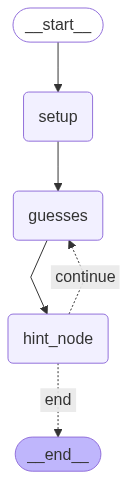

In [10]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [11]:
result = app.invoke({"player_name": "Student", "guesses": [], "attempts": 0, "lower_bound": 1, "upper_bound": 20})

Welcome, Student! The game has begun. I'm thinking of a number between 1 and 20.
Attempt 1: Guessing 18 (Current range: 1-20)
Hint: The number 18 is too high
CONTINUING: 1/7 attempts used
Attempt 2: Guessing 7 (Current range: 1-17)
Hint: The number 7 is too low
CONTINUING: 2/7 attempts used
Attempt 3: Guessing 13 (Current range: 8-17)
Hint: The number 13 is too high
CONTINUING: 3/7 attempts used
Attempt 4: Guessing 9 (Current range: 8-12)
Hint: The number 9 is too low
CONTINUING: 4/7 attempts used
Attempt 5: Guessing 12 (Current range: 10-12)
Hint: The number 12 is too high
CONTINUING: 5/7 attempts used
Attempt 6: Guessing 10 (Current range: 10-11)
You found the answer in 6 attempts!
